# Basis and Change of Basis
> My learning notes.

- toc: true 
- badges: true
- comments: true
- categories: [linear_algebra]
- image: images/chart-preview.png

Let's think of the rank of a matrix as a measure of its "dimensionality" or "independent directions."

Imagine you have a set of vectors. If these vectors point in completely different directions (are independent of each other), then they can span a certain space. The rank of a matrix essentially tells you how many independent directions or dimensions this matrix can define.

Here's a simple way to look at it:

1. **Vectors in Space**: Think of each row of a matrix as a vector. If one row is a linear combination (a combination like \(2 \times \text{row}_1 + 3 \times \text{row}_2\)) of other rows, then it's not adding a new "direction" or "information" to our set.

2. **Rank and Dimensions**: The rank of a matrix is like counting how many truly independent directions (or dimensions) these rows (vectors) span. If you have a matrix with a rank of 3, it means that the information in that matrix spans a three-dimensional space. No more, no less.

3. **Applications**:
    - **Linear Systems**: In systems of equations, the rank can help you determine if you have a unique solution, no solution, or infinitely many solutions.
    - **Data Analysis**: In data science, understanding the rank of a data matrix can help determine its dimensionality and how much information is captured by the data.
    - **Optimization**: In various optimization problems, the rank can provide insights into the structure of the problem.

In essence, the rank of a matrix provides a compact way to understand the "effective" dimensionality or independence of the information it represents.

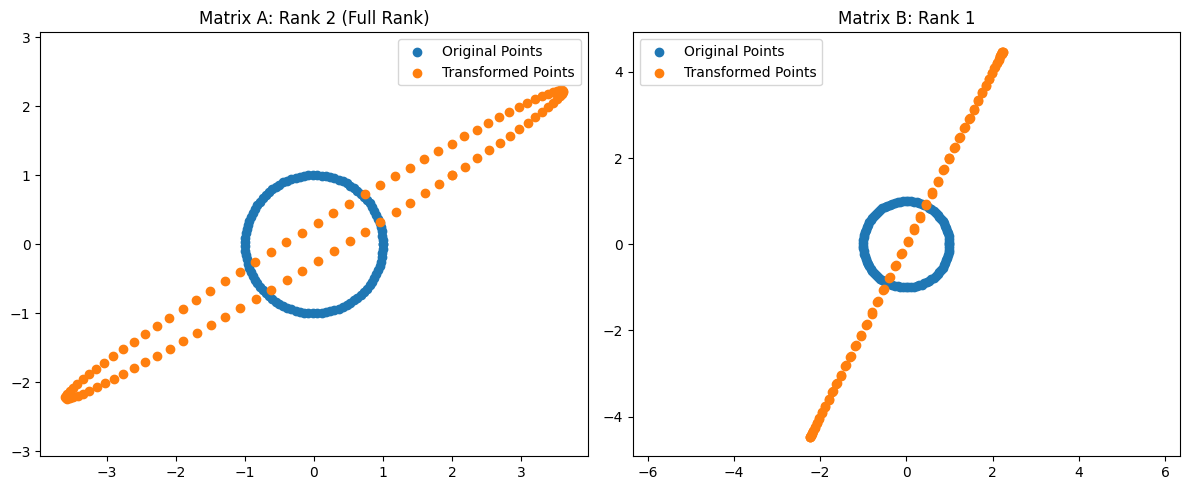

In [11]:
import torch
import matplotlib.pyplot as plt

# Define a 2x2 matrix with determinant != 0 (full rank)
A = torch.tensor([[2, 3],
                  [1, 2]], dtype=torch.float32)

# Define a 2x2 matrix with one row being a multiple of the other (rank 1)
B = torch.tensor([[1, 2],
                  [2, 4]], dtype=torch.float32)

# Generate 100 points in a unit circle
theta = torch.linspace(0, 2 * 3.141592, 100)
x = torch.cos(theta)
y = torch.sin(theta)
points = torch.stack([x, y])

# Transform points using matrix A
transformed_A = torch.matmul(A, points)
x_A, y_A = transformed_A[0], transformed_A[1]

# Transform points using matrix B
transformed_B = torch.matmul(B, points)
x_B, y_B = transformed_B[0], transformed_B[1]

# Plotting
plt.figure(figsize=(12, 5))

# Plot for matrix A (full rank)
plt.subplot(1, 2, 1)
plt.title('Matrix A: Rank 2 (Full Rank)')
plt.scatter(x, y, label='Original Points')
plt.scatter(x_A, y_A, label='Transformed Points')
plt.legend()
plt.axis('equal')

# Plot for matrix B (rank 1)
plt.subplot(1, 2, 2)
plt.title('Matrix B: Rank 1')
plt.scatter(x, y, label='Original Points')
plt.scatter(x_B, y_B, label='Transformed Points')
plt.legend()
plt.axis('equal')

plt.tight_layout()


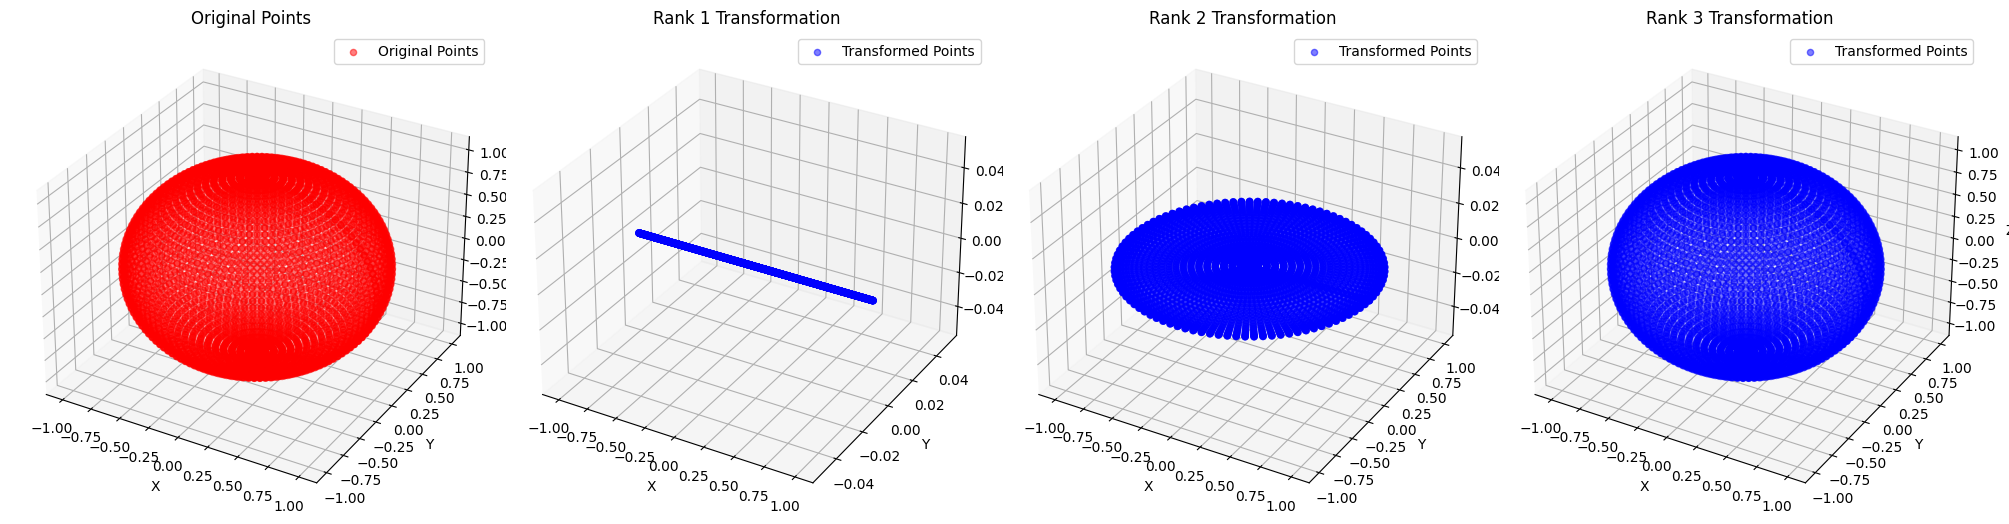

In [10]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Rank 1 matrix (very simplified representation)
B_rank1 = torch.tensor([[1, 0, 0],
                        [0, 0, 0],
                        [0, 0, 0]], dtype=torch.float32)

# Rank 2 matrix (very simplified representation)
C_rank2 = torch.tensor([[1, 0, 0],
                        [0, 1, 0],
                        [0, 0, 0]], dtype=torch.float32)

# Generate 3D points on a unit sphere
phi = torch.linspace(0, 2 * 3.141592, 100)
theta = torch.linspace(0, 3.141592, 50)
phi, theta = torch.meshgrid(phi, theta)
x = torch.sin(theta) * torch.cos(phi)
y = torch.sin(theta) * torch.sin(phi)
z = torch.cos(theta)

points = torch.stack([x.flatten(), y.flatten(), z.flatten()])

# Transform points using matrices
transformed_rank1 = torch.matmul(B_rank1, points)
transformed_rank2 = torch.matmul(C_rank2, points)

# Plotting
fig = plt.figure(figsize=(20, 6))

# Original Points (no transformation)
ax1 = fig.add_subplot(1, 4, 1, projection='3d')
ax1.scatter(points[0], points[1], points[2], label='Original Points', alpha=0.5, c='r')
ax1.set_title('Original Points')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Rank 1 Transformation
ax2 = fig.add_subplot(1, 4, 2, projection='3d')
ax2.scatter(transformed_rank1[0], transformed_rank1[1], transformed_rank1[2], label='Transformed Points', alpha=0.5, c='b')
ax2.set_title('Rank 1 Transformation')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.legend()

# Rank 2 Transformation
ax3 = fig.add_subplot(1, 4, 3, projection='3d')
ax3.scatter(transformed_rank2[0], transformed_rank2[1], transformed_rank2[2], label='Transformed Points', alpha=0.5, c='b')
ax3.set_title('Rank 2 Transformation')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')
ax3.legend()

# Rank 3 Transformation (from the previous example)
ax4 = fig.add_subplot(1, 4, 4, projection='3d')
ax4.scatter(transformed_A[0], transformed_A[1], transformed_A[2], label='Transformed Points', alpha=0.5, c='b')
ax4.set_title('Rank 3 Transformation')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
ax4.legend()

plt.tight_layout()
